<a href="https://colab.research.google.com/github/Jhinukroy/recognition-/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
image =cv2.imread("/content/Screenshot 2024-03-25 125228.png")

In [ ]:
image =cv2.imread("/content/re2.png")

In [ ]:
image =cv2.imread("/content/re3.png")

In [ ]:
type(image)

In [ ]:
image.shape

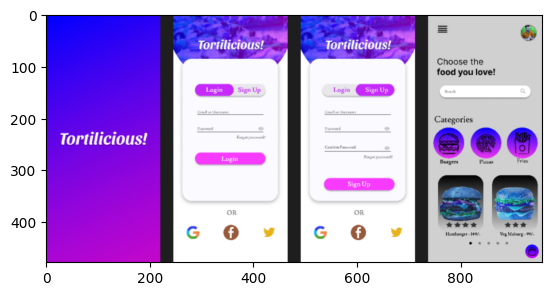

In [112]:
plt.imshow(image)

In [9]:
new_image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [114]:
"""
1. Splitting image channels

"""
r,g,b =cv2.split(new_image)
print('r', r.shape)
print('g', g.shape)
print('b', b.shape)


r (478, 958)
g (478, 958)
b (478, 958)


In [115]:
"""
resize"""

s=10
w=int(new_image.shape[1]*s/100)
h=int(new_image.shape[0]*s/100)
dim= (w,h)
re_size = cv2.resize(new_image,dim, interpolation= cv2.INTER_AREA)
re_size.shape


(47, 95, 3)

In [116]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [117]:
yolo= cv2.dnn.readNet("/content/yolov3-tiny.weights", "/content/yolov3-tiny.cfg")

In [118]:
classes = []
with open("/content/coco.names",'r') as f:
  classes= f.read().splitlines()


In [119]:
len(classes)

80

In [83]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [120]:
img=cv2.imread("/content/re1.png")

blob = cv2.dnn.blobFromImage (img, 1/255, (320,320), (0,0,0), swapRB=True, crop = False)


In [121]:
blob.shape


(1, 3, 320, 320)

In [122]:
# print image

i = blob[0].reshape(320,320,3)

In [123]:
yolo.setInput(blob)

In [124]:
output_layers_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_name)



In [125]:

boxes = []
confidences = []
class_ids = []
for output in layeroutput:
    for detection in output:
        scores = detection[5:]  # Extract confidence scores
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.7:
            center_x = int(detection[0] *width)
            center_y = int(detection[1] *height)
            w = int(detection[2] *width)
            h = int(detection[3] *height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)




In [126]:
len(boxes)

0

In [127]:
 indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

In [128]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes),3))

In [134]:
for i in list(indexes):
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confi = str(round(confidence[i], 2))
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            cv2.putText(img,label + " " +confi, (x,y+20),font,2,(255,255,255),1)


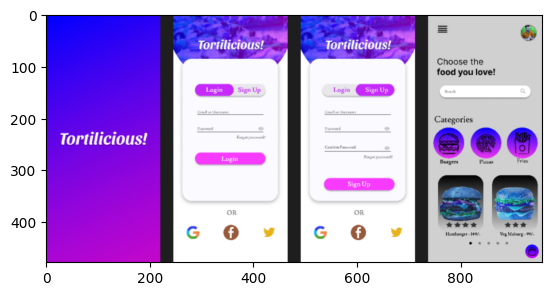

In [135]:
plt.imshow(image)